In [85]:
import pandas as pd
import pandas.io.sql as sqlio
import psycopg2

sql = """
select l.locationDesc, d.topic, avg(DataValue) from location l
left join disease d
on l.locationId = d.locationId
left join question q
on q.questionId = d.questionId
where q.question not like '%vaccination%' and d.datavalueunit not like 'Number%'
group by l.locationDesc, d.topic
order by avg(DataValue) desc
limit 20

"""

try:
    dbConnection = psycopg2.connect(
        user = "dap",
        password = "dap",
        host = "127.0.0.1",
        port = "5432",
        database = "Disease"
    )
    count_dataframe = sqlio.read_sql_query(sql, dbConnection)
except (Exception , psycopg2.Error) as dbError :
    print ("Error:", dbError)
finally:
    if dbConnection in locals(): 
        dbConnection.close()

In [86]:
count_dataframe  # print out the first five rows of the dataframe

,locationdesc,topic,avg
0,Wisconsin,Diabetes,53.966667
1,North Dakota,Diabetes,52.767123
2,South Dakota,Diabetes,51.161765
3,Maine,Diabetes,50.816667
4,Delaware,Diabetes,48.382716
5,District of Columbia,Diabetes,48.029851
6,Ohio,Diabetes,47.506329
7,Missouri,Diabetes,47.146667
8,Florida,Diabetes,46.781609
9,Virginia,Diabetes,46.387500


In [48]:
import pandas as pd
import pandas.io.sql as sqlio
import psycopg2

sql = """
select l.locationDesc, d.topic, avg(DataValue) from location l
left join disease d
on l.locationId = d.locationId
left join question q
on q.questionId = d.questionId
where q.question like '%vaccination%' and d.datavalueunit not like 'Number%'
group by l.locationDesc, d.topic
order by avg(DataValue) desc
limit 5

"""

try:
    dbConnection = psycopg2.connect(
        user = "dap",
        password = "dap",
        host = "127.0.0.1",
        port = "5432",
        database = "Disease"
    )
    count_dataframe = sqlio.read_sql_query(sql, dbConnection)
except (Exception , psycopg2.Error) as dbError :
    print ("Error:", dbError)
finally:
    if dbConnection in locals(): 
        dbConnection.close()

In [49]:
count_dataframe  # print out the first five rows of the dataframe

,locationdesc,topic,avg
0,Vermont,Diabetes,68.812500
1,New Hampshire,Diabetes,68.625000
2,South Dakota,Asthma,67.852941
3,Maine,Asthma,66.000000
4,Maryland,Asthma,65.952500


In [50]:
import pandas as pd
import pandas.io.sql as sqlio
import psycopg2

sql = """
select l.locationDesc, d.topic, avg(DataValue) from location l
left join disease d
on l.locationId = d.locationId
left join question q
on q.questionId = d.questionId
where q.question not like '%vaccination%' and d.datavalueunit not like 'Number%'
group by l.locationDesc, d.topic

"""

try:
    dbConnection = psycopg2.connect(
        user = "dap",
        password = "dap",
        host = "127.0.0.1",
        port = "5432",
        database = "Disease"
    )
    count_dataframe = sqlio.read_sql_query(sql, dbConnection)
except (Exception , psycopg2.Error) as dbError :
    print ("Error:", dbError)
finally:
    if dbConnection in locals(): 
        dbConnection.close()

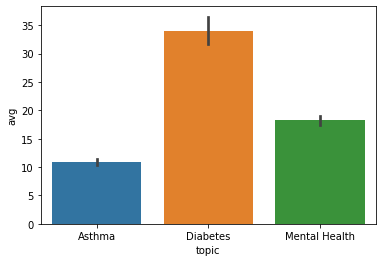

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
_ = sns.barplot(x="topic", y="avg", data=count_dataframe)

In [54]:
import pandas as pd
import pandas.io.sql as sqlio
import psycopg2

sql = """
select l.locationDesc, d.topic, avg(DataValue) from location l
left join disease d
on l.locationId = d.locationId
left join question q
on q.questionId = d.questionId
where q.question like '%vaccination%' and d.datavalueunit not like 'Number%'
group by l.locationDesc, d.topic

"""

try:
    dbConnection = psycopg2.connect(
        user = "dap",
        password = "dap",
        host = "127.0.0.1",
        port = "5432",
        database = "Disease"
    )
    count_dataframe = sqlio.read_sql_query(sql, dbConnection)
except (Exception , psycopg2.Error) as dbError :
    print ("Error:", dbError)
finally:
    if dbConnection in locals(): 
        dbConnection.close()

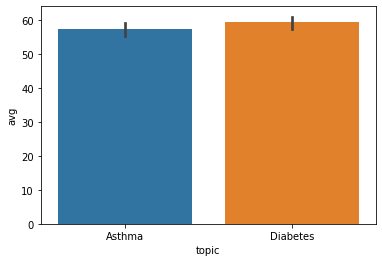

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
_ = sns.barplot(x="topic", y="avg", data=count_dataframe)

In [56]:
import pandas as pd
import pandas.io.sql as sqlio
import psycopg2

sql = """
SELECT * FROM Disease;"""

try:
    dbConnection = psycopg2.connect(
        user = "dap",
        password = "dap",
        host = "127.0.0.1",
        port = "5432",
        database = "Disease"
    )
    Disease_dataframe = sqlio.read_sql_query(sql, dbConnection)
except (Exception , psycopg2.Error) as dbError :
    print ("Error:", dbError)
finally:
    if dbConnection in locals(): 
        dbConnection.close()

In [57]:
Disease_dataframe.describe()


,yearstart,yearend,datavalue,datavaluealt,lowconfidencelimit,highconfidencelimit
count,8139.0,8139.0,8139.000000,8139.000000,8139.000000,8139.000000
mean,2020.0,2020.0,40.531404,40.781128,33.956629,47.419941
std,0.0,0.0,27.118994,27.175552,24.430667,29.350988
min,2020.0,2020.0,2.000000,2.100000,1.400000,2.600000
25%,2020.0,2020.0,12.000000,12.300000,9.700000,15.500000
50%,2020.0,2020.0,41.300000,41.600000,31.900000,52.000000
75%,2020.0,2020.0,65.000000,65.300000,54.500000,74.100000
max,2020.0,2020.0,94.000000,94.000000,87.300000,97.700000


In [59]:
import pandas.io.sql as sqlio
import psycopg2

sql = """
select l.locationAbbr, avg(DataValue) from location l
left join disease d
on l.locationId = d.locationId
where d.datavalueunit not like 'Number%'
group by l.locationAbbr 
order by avg(DataValue) desc limit 5;"""

try:
    dbConnection = psycopg2.connect(
        user = "dap",
        password = "dap",
        host = "127.0.0.1",
        port = "5432",
        database = "Disease"
    )
    dataframe = sqlio.read_sql_query(sql, dbConnection)
except (Exception , psycopg2.Error) as dbError :
    print ("Error:", dbError)
finally:
    if dbConnection in locals(): 
        dbConnection.close()

In [60]:
dataframe

,locationabbr,avg
0,SD,54.475159
1,ME,53.627737
2,ND,52.504698
3,WI,52.456204
4,VT,50.081308


In [61]:
import pandas as pd
import pandas.io.sql as sqlio
import psycopg2

sql = """
select l.locationAbbr, avg(DataValue) from location l
left join disease d
on l.locationId = d.locationId
where d.datavalueunit not like 'Number%'
group by l.locationAbbr;"""

try:
    dbConnection = psycopg2.connect(
        user = "dap",
        password = "dap",
        host = "127.0.0.1",
        port = "5432",
        database = "Disease"
    )
    dataframe = sqlio.read_sql_query(sql, dbConnection)
except (Exception , psycopg2.Error) as dbError :
    print ("Error:", dbError)
finally:
    if dbConnection in locals(): 
        dbConnection.close()

In [63]:
dataframe.head()

,locationabbr,avg
0,CA,40.319380
1,NH,49.113208
2,OR,43.030973
3,US,47.946667
4,TX,41.260784


In [64]:
dataframe.tail()

,locationabbr,avg
49,SC,42.925833
50,VA,47.217778
51,DE,47.701190
52,AZ,40.257047
53,KS,42.269841


<AxesSubplot:xlabel='avg'>

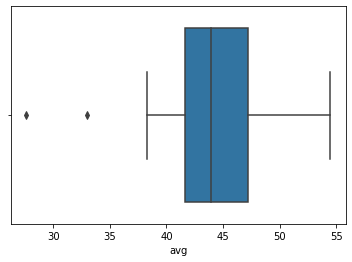

In [65]:
sns.boxplot(x=dataframe["avg"])


In [78]:
import pandas as pd
import pandas.io.sql as sqlio
import psycopg2

sql = """
select d.Topic, DataValueType, avg(DataValue) from Disease d
left join stratification1 s
on d.stratificationId1 = s.stratificationId1
where d.datavalueunit not like 'Number%'
group by d.Topic, DataValueType;"""

try:
    dbConnection = psycopg2.connect(
        user = "dap",
        password = "dap",
        host = "127.0.0.1",
        port = "5432",
        database = "Disease"
    )
    count_dataframe = sqlio.read_sql_query(sql, dbConnection)
except (Exception , psycopg2.Error) as dbError :
    print ("Error:", dbError)
finally:
    if dbConnection in locals(): 
        dbConnection.close()

In [79]:
count_dataframe

,topic,datavaluetype,avg
0,Diabetes,Age-adjusted Prevalence,47.824804
1,Diabetes,Crude Prevalence,46.053936
2,Asthma,Age-adjusted Prevalence,44.076560
3,Asthma,Crude Prevalence,41.400362
4,Mental Health,Crude Prevalence,18.240529


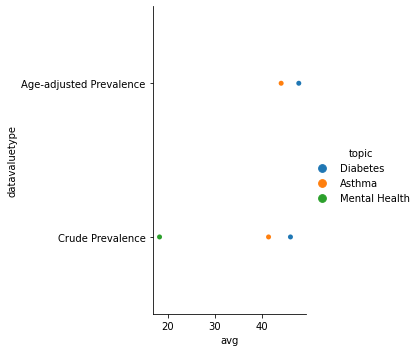

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.catplot(data=count_dataframe, y="datavaluetype", x="avg",hue="topic", kind="swarm")

In [68]:
count_dataframe.tail() 

,topic,datavaluetype,avg
0,Diabetes,Age-adjusted Prevalence,47.824804
1,Diabetes,Crude Prevalence,46.053936
2,Asthma,Age-adjusted Prevalence,44.076560
3,Asthma,Crude Prevalence,41.400362
4,Mental Health,Crude Prevalence,18.240529


In [69]:
import pandas as pd
import pandas.io.sql as sqlio
import psycopg2

sql = """
select stratificationCategory1, avg(DataValue) from Disease d
left join stratification1 s
on d.stratificationId1 = s.stratificationId1
where d.datavalueunit not like 'Number%'
group by stratificationCategory1;"""

try:
    dbConnection = psycopg2.connect(
        user = "dap",
        password = "dap",
        host = "127.0.0.1",
        port = "5432",
        database = "Disease"
    )
    count_dataframe = sqlio.read_sql_query(sql, dbConnection)
except (Exception , psycopg2.Error) as dbError :
    print ("Error:", dbError)
finally:
    if dbConnection in locals(): 
        dbConnection.close()

In [70]:
count_dataframe.head() 

,stratificationcategory1,avg
0,Overall,46.110771
1,Gender,49.212583
2,Race/Ethnicity,39.459191


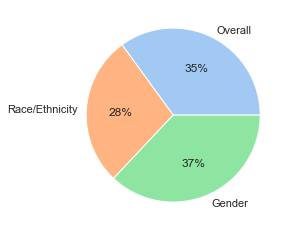

In [196]:
import matplotlib.pyplot as plt
import seaborn as sns

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data=count_dataframe, x = "avg", labels = "stratificationcategory1" , colors = colors, autopct='%.0f%%')
plt.show()

In [72]:
import pandas as pd
import pandas.io.sql as sqlio
import psycopg2

sql = """
select d.Topic,d.datavalueunit,q.question, avg(d.datavalue) from disease d
left join question  q
on d.questionid=q.questionid 
left join Topic t
on d.topicid= t.topicid
where d.datavalueunit not like 'Number%'
group by d.topic,d.datavalueunit,q.question
order by topic;"""

try:
    dbConnection = psycopg2.connect(
        user = "dap",
        password = "dap",
        host = "127.0.0.1",
        port = "5432",
        database = "Disease"
    )
    count_dataframe = sqlio.read_sql_query(sql, dbConnection)
except (Exception , psycopg2.Error) as dbError :
    print ("Error:", dbError)
finally:
    if dbConnection in locals(): 
        dbConnection.close()

In [73]:
count_dataframe

,topic,datavalueunit,question,avg
0,Asthma,%,Influenza vaccination among noninstitutionaliz...,73.295897
1,Asthma,%,Influenza vaccination among noninstitutionaliz...,47.466403
2,Asthma,%,Asthma prevalence among women aged 18-44 years,13.294737
3,Asthma,%,Pneumococcal vaccination among noninstitutiona...,36.591411
4,Asthma,%,Pneumococcal vaccination among noninstitutiona...,83.329231
5,Asthma,%,Current asthma prevalence among adults aged >=...,10.391785
6,Diabetes,%,Visits to dentist or dental clinic among adult...,58.629496
7,Diabetes,%,Glycosylated hemoglobin measurement among adul...,67.369863
8,Diabetes,%,Prevalence of diagnosed diabetes among adults ...,10.774648
9,Diabetes,%,Influenza vaccination among noninstitutionaliz...,52.129921


In [74]:
import pandas as pd
import pandas.io.sql as sqlio
import psycopg2

sql = """
select sc.stratificationcategory1, d.stratification1, avg(datavalue) from disease d
full join stratificationcategory1 sc
On d.stratificationcategoryId1 = sc.stratificationcategoryId1
full join
stratification1 s
On d.stratificationid1 = s.stratificationid1
Where d.stratificationcategory1 = 'Race/Ethnicity' and d.datavalueunit not like 'Number%'
Group by sc.stratificationcategory1, d.stratification1
;"""

try:
    dbConnection = psycopg2.connect(
        user = "dap",
        password = "dap",
        host = "127.0.0.1",
        port = "5432",
        database = "Disease"
    )
    count_dataframe = sqlio.read_sql_query(sql, dbConnection)
except (Exception , psycopg2.Error) as dbError :
    print ("Error:", dbError)
finally:
    if dbConnection in locals(): 
        dbConnection.close()

In [75]:
count_dataframe

,stratificationcategory1,stratification1,avg
0,Race/Ethnicity,Hispanic,27.914639
1,Race/Ethnicity,"Black, non-Hispanic",37.794695
2,Race/Ethnicity,"White, non-Hispanic",48.166167
3,Race/Ethnicity,"Multiracial, non-Hispanic",19.956667
4,Race/Ethnicity,"Other, non-Hispanic",29.202857


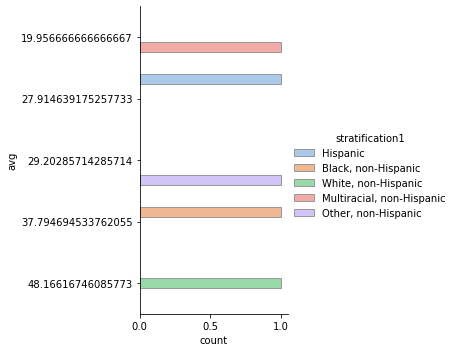

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns



sns.catplot(
    data=count_dataframe, y="avg",hue="stratification1", kind="count",palette="pastel",edgecolor=".6")


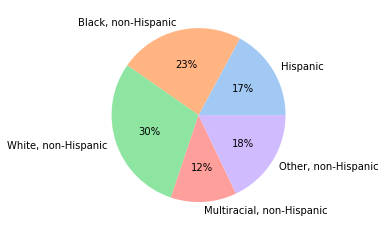

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data=count_dataframe, x = "avg", labels = "stratification1" , colors = colors, autopct='%.0f%%')
plt.show()

In [81]:
import pandas as pd
import pandas.io.sql as sqlio
import psycopg2

sql = """
select sc.stratificationcategory1, d.stratification1, avg(datavalue) from disease d
full join stratificationcategory1 sc
On d.stratificationcategoryId1 = sc.stratificationcategoryId1
full join
stratification1 s
On d.stratificationid1 = s.stratificationid1
Where d.stratificationcategory1 = 'Gender' and d.datavalueunit not like 'Number%'
Group by sc.stratificationcategory1, d.stratification1
;"""

try:
    dbConnection = psycopg2.connect(
        user = "dap",
        password = "dap",
        host = "127.0.0.1",
        port = "5432",
        database = "Disease"
    )
    count_dataframe = sqlio.read_sql_query(sql, dbConnection)
except (Exception , psycopg2.Error) as dbError :
    print ("Error:", dbError)
finally:
    if dbConnection in locals(): 
        dbConnection.close()

In [186]:
count_dataframe

,stratificationcategory1,stratification1,avg
0,Gender,Female,48.504164
1,Gender,Male,43.148065


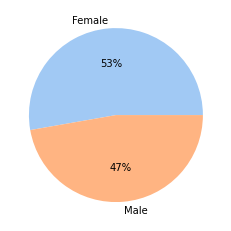

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data=count_dataframe, x = "avg", labels = "stratification1" , colors = colors, autopct='%.0f%%')
plt.show()

In [87]:
import pandas as pd
import pandas.io.sql as sqlio
import psycopg2

sql = """
select l.locationDesc, d.topic, avg(DataValue) from location l
left join disease d
on l.locationId = d.locationId
left join question q
on q.questionId = d.questionId
where q.question not like '%vaccination%' and d.topic like 'Asthma' and d.datavalueunit not like 'Number%'
group by l.locationDesc, d.topic
order by avg(DataValue) desc
limit 5

"""

try:
    dbConnection = psycopg2.connect(
        user = "dap",
        password = "dap",
        host = "127.0.0.1",
        port = "5432",
        database = "Disease"
    )
    count_dataframe = sqlio.read_sql_query(sql, dbConnection)
except (Exception , psycopg2.Error) as dbError :
    print ("Error:", dbError)
finally:
    if dbConnection in locals(): 
        dbConnection.close()

In [88]:
count_dataframe

,locationdesc,topic,avg
0,Wisconsin,Asthma,15.471429
1,Vermont,Asthma,14.800000
2,Rhode Island,Asthma,14.527778
3,Kentucky,Asthma,14.092857
4,West Virginia,Asthma,14.008333
